#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [777]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [778]:
# Carregar base de dados preparada no modulo5
credit_proposal = pd.read_csv("./credit_proposal.csv")
credit_proposal.drop("Unnamed: 0", axis=1, inplace=True) # Dropar coluna que foi criada ao salvar o dataframe

credit_proposal.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,default
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,False
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,True
5,5008826,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,True
6,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,True
7,5008832,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10031,-1469,1,0,1,0,Laborers,2.0,True
8,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,NaN,2.0,False
9,5008835,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10968,-1620,1,0,0,0,NaN,2.0,False


In [779]:
# Informações de tipo e quantidade de linhas das variaveis
credit_proposal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   16650 non-null  int64  
 1   CODE_GENDER          16650 non-null  object 
 2   FLAG_OWN_CAR         16650 non-null  object 
 3   FLAG_OWN_REALTY      16650 non-null  object 
 4   CNT_CHILDREN         16650 non-null  int64  
 5   AMT_INCOME_TOTAL     16650 non-null  float64
 6   NAME_INCOME_TYPE     16650 non-null  object 
 7   NAME_EDUCATION_TYPE  16650 non-null  object 
 8   NAME_FAMILY_STATUS   16650 non-null  object 
 9   NAME_HOUSING_TYPE    16650 non-null  object 
 10  DAYS_BIRTH           16650 non-null  int64  
 11  DAYS_EMPLOYED        16650 non-null  int64  
 12  FLAG_MOBIL           16650 non-null  int64  
 13  FLAG_WORK_PHONE      16650 non-null  int64  
 14  FLAG_PHONE           16650 non-null  int64  
 15  FLAG_EMAIL           16650 non-null 

In [780]:
# Porcentagem de dados missings
(credit_proposal.isnull().sum() / credit_proposal.shape[0]) * 100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        31.501502
CNT_FAM_MEMBERS         0.000000
default                 0.000000
dtype: float64

In [781]:
# Coluna OCCUPATION_TYPE possuim um grande volume de dados faltantes
credit_proposal.drop("OCCUPATION_TYPE", axis=1, inplace=True) # Dropar coluna com muitos dados missings

Os defaults representam cerca de 14.15% da base de dados


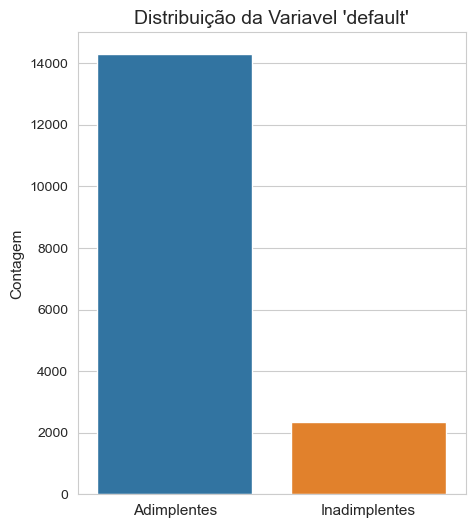

In [782]:
# Plotar grafico de contagem da variavel defaut
ax = sns.countplot(credit_proposal, x="default")
ax.set_xticklabels(["Adimplentes", "Inadimplentes"], size=11) # Alterar ticks x
ax.set_ylabel("Contagem", size=11) # Modificar titulo do eixo y
ax.set_xlabel("") 
ax.set_title("Distribuição da Variavel 'default'", size=14) # Adicionar titulo ao grafico

# Porcetagem de deafult em relação ao dataframe
print(f"Os defaults representam cerca de {round((credit_proposal.default.sum() / credit_proposal.shape[0] * 100), 2)}% da base de dados")

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [783]:
# Atribuir nome das colunas a variavel columns
columns = credit_proposal.columns
data_type = [credit_proposal.dtypes[i] for i in range(len(columns))] # Iterar sobre o atributo dtype com loop for
                                                                     # Atribuir valores a variavel data_type

df = pd.DataFrame(data=columns, columns=["coluna"]) # Criar data frame com os dados das colunas
df["tipo"] = data_type # Criar coluna tipo com dados de tipo
df

,coluna,tipo
0,ID,int64
1,CODE_GENDER,object
2,FLAG_OWN_CAR,object
3,FLAG_OWN_REALTY,object
4,CNT_CHILDREN,int64
5,AMT_INCOME_TOTAL,float64
6,NAME_INCOME_TYPE,object
7,NAME_EDUCATION_TYPE,object
8,NAME_FAMILY_STATUS,object
9,NAME_HOUSING_TYPE,object


In [784]:
qtd_categorias = [credit_proposal.nunique()[i] for i in range(len(columns))] # Iterar sobre saida do metodo nunique()

df["qtd_categorias"] = qtd_categorias # atribuir valores a coluna qtd_categorias
df

,coluna,tipo,qtd_categorias
0,ID,int64,16650
1,CODE_GENDER,object,2
2,FLAG_OWN_CAR,object,2
3,FLAG_OWN_REALTY,object,2
4,CNT_CHILDREN,int64,8
5,AMT_INCOME_TOTAL,float64,221
6,NAME_INCOME_TYPE,object,5
7,NAME_EDUCATION_TYPE,object,5
8,NAME_FAMILY_STATUS,object,5
9,NAME_HOUSING_TYPE,object,6


In [785]:
# Criar df de dummies das colunas categoricas
dummies = pd.get_dummies(credit_proposal[["ID", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", 
                                          "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]])
dummies

,ID,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008806,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,5008810,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,5008811,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,5112956,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,5008825,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,5149042,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16646,5149056,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16647,5149145,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16648,5149158,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [786]:
# Dropar colunas originais do dataframe principal
credit_proposal.drop(["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", 
                    "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"], 
                    axis=1,
                    inplace=True)

In [787]:
# Concatenar dummies e df principal com parametro inner
credit_proposal = credit_proposal.merge(dummies, on="ID", how="inner")
credit_proposal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16650 entries, 0 to 16649
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 16650 non-null  int64  
 1   CODE_GENDER                                        16650 non-null  object 
 2   FLAG_OWN_CAR                                       16650 non-null  object 
 3   FLAG_OWN_REALTY                                    16650 non-null  object 
 4   CNT_CHILDREN                                       16650 non-null  int64  
 5   AMT_INCOME_TOTAL                                   16650 non-null  float64
 6   DAYS_BIRTH                                         16650 non-null  int64  
 7   DAYS_EMPLOYED                                      16650 non-null  int64  
 8   FLAG_MOBIL                                         16650 non-null  int64  
 9   FLAG_W

In [788]:
# Transformar variaveis booleanas em int 
credit_proposal["CODE_GENDER"] = credit_proposal.CODE_GENDER.map({"M":1, "F":0}) 
credit_proposal["FLAG_OWN_CAR"] = credit_proposal.FLAG_OWN_CAR.map({"Y":1, "N":0})
credit_proposal["FLAG_OWN_REALTY"] = credit_proposal.FLAG_OWN_REALTY.map({"Y":1, "N":0})

# Mesmo para variavel default, porem com metodo diferente
credit_proposal["default"] = credit_proposal.default.astype(int)
credit_proposal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16650 entries, 0 to 16649
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 16650 non-null  int64  
 1   CODE_GENDER                                        16650 non-null  int64  
 2   FLAG_OWN_CAR                                       16650 non-null  int64  
 3   FLAG_OWN_REALTY                                    16650 non-null  int64  
 4   CNT_CHILDREN                                       16650 non-null  int64  
 5   AMT_INCOME_TOTAL                                   16650 non-null  float64
 6   DAYS_BIRTH                                         16650 non-null  int64  
 7   DAYS_EMPLOYED                                      16650 non-null  int64  
 8   FLAG_MOBIL                                         16650 non-null  int64  
 9   FLAG_W

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [789]:
# Criar funcao para plotar graficos
def plot_grafico(freq, xtick: list, legend: list, title: str):

    plt.rc("figure", figsize=(5,6)) # Tamanho da figura
    freq.plot.bar() # Plotar grafico da tabela de dados cruzados
    plt.axis([-0.5, 1.5, 0, 100]) # Parametros de eixo x e y
    # Paraemtros esteticos ao grafico
    plt.xticks([0, 1], xtick, rotation=0) 
    plt.legend(legend)
    plt.xlabel("")
    plt.ylabel("Porcetagem(%)")
    plt.title(title, size=13)

    return freq # Retornar tabela de dados cruzados

FLAG_OWN_CAR,0,1
FLAG_EMAIL,,
0,61.575478,38.424522
1,56.554054,43.445946


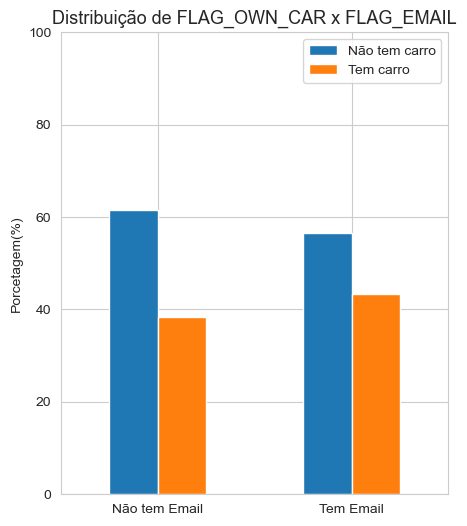

In [790]:
# Cruzar dados
freq_1 = pd.crosstab(credit_proposal["FLAG_EMAIL"], credit_proposal["FLAG_OWN_CAR"])
freq_sum_1 = freq_1.sum(axis=1) # Somar colunas 
freq_pctline_1 = (freq_1.div(freq_sum_1, axis=0))*100 # Dividir linhas 

plot_grafico(freq_pctline_1, # Plotar grafico
             ["Não tem Email", "Tem Email"],
             ["Não tem carro", "Tem carro"],
             "Distribuição de FLAG_OWN_CAR x FLAG_EMAIL")

FLAG_OWN_CAR,0,1
default,,
0,60.983629,39.016371
1,62.011885,37.988115


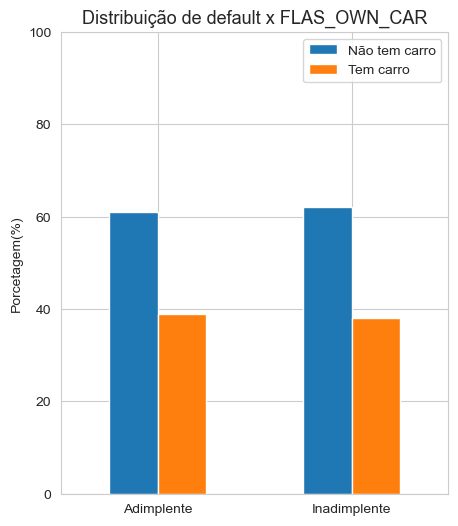

In [791]:
freq_2 = pd.crosstab(credit_proposal["default"], credit_proposal["FLAG_OWN_CAR"])
freq_sum_2 = freq_2.sum(axis=1)
freq_pctline_2 = (freq_2.div(freq_sum_2, axis=0))*100

plot_grafico(freq_pctline_2,
            ["Adimplente", "Inadimplente"],
            ["Não tem carro", "Tem carro"],
            "Distribuição de default x FLAS_OWN_CAR")

FLAG_EMAIL,0,1
default,,
0,91.248076,8.751924
1,90.280136,9.719864


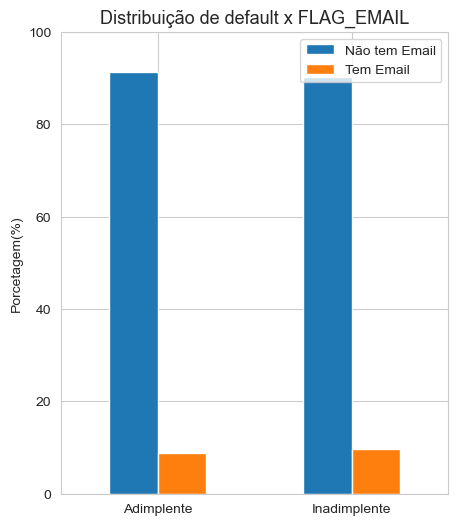

In [792]:
freq_3 = pd.crosstab(credit_proposal["default"], credit_proposal["FLAG_EMAIL"])
freq_sum_3 = freq_3.sum(axis=1)
freq_pctline_3 = (freq_3.div(freq_sum, axis=0))*100

plot_grafico(freq_pctline_3,
            ["Adimplente", "Inadimplente"],
            ["Não tem Email", "Tem Email"],
            "Distribuição de default x FLAG_EMAIL")

### Insights
* **Ambas as variaveis possuem uma distribuição muito parecida, no que tange a variavel target.**
* **As variaveis possuem um corpotamento inverso em relação a distribuição delas. Exemplo, os clientes que não possuem carro, tem uma tendencia ligeiramente maior a inadimplência, já os que possuem carro, tendem um pouco mais para o lado da adimplência. O mesmo ocorre com a variavel FLAG_EMAIL porém inversamente a essa lógica.**
* **Os clientes que não tem e-mail tem uma tendência significativa também não terem carro, já os clientes que possuem e-mail tendem a ter carro.**
***************
## Conclusão
**Analisando o gráfico de barras, percebe-se que as duas variaveis tem um poder de explicação igualmente relevante, porém com uma análise suplementar a essa, podemos concluir que a variavel FLAG_OWN_CAR pode ter um potêncial ligeiramente maior.**

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [794]:
# Dataframe pronto para arvore de dados
credit_proposal

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008806,1,1,1,0,112500.0,-21474,-1134,1,0,...,1,0,0,0,0,1,0,0,0,0
1,5008810,0,0,1,0,270000.0,-19110,-3051,1,0,...,0,0,1,0,0,1,0,0,0,0
2,5008811,0,0,1,0,270000.0,-19110,-3051,1,0,...,0,0,1,0,0,1,0,0,0,0
3,5112956,1,1,1,0,270000.0,-16872,-769,1,1,...,1,0,0,0,0,1,0,0,0,0
4,5008825,0,1,0,0,130500.0,-10669,-1103,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,5149042,0,0,1,0,180000.0,-19750,-3608,1,0,...,0,0,0,0,0,1,0,0,0,0
16646,5149056,0,0,1,0,112500.0,-15837,-2694,1,1,...,1,0,0,0,0,1,0,0,0,0
16647,5149145,1,1,1,0,247500.0,-10952,-3577,1,1,...,1,0,0,0,0,1,0,0,0,0
16648,5149158,1,1,1,0,247500.0,-10952,-3577,1,1,...,1,0,0,0,0,1,0,0,0,0


In [793]:
credit_proposal.to_csv(path_or_buf="credit_proposal_arvore.csv")